# Graphs

The graphs we will talk about today are different from the graphs we can plot using `matplotlib`.

Graphs are similar to lists, tuples, and dictionaries in the sense that they are a *data type* (a way to store and organize data). But graphs are different from the data types we have seen so far because it is **abstract**. What we mean by that is that there is no corresponding data structure in python. When we program using graphs, the graphs are implemented using lists, dictionaries, or tuples; and the notion that a certain structure represents a graph is in our head, abstract.

Even with the lack of a concrete data structure, graphs are an extremely useful tool for modelling all sorts of problems, specially those where *networks* are involved. Some examples of graph applications are:

- Finding the best route between locations
- Represent friend connections in social networks (find influencial people, suggest friends)
- Coloring maps without having two adjacent regions with the same color
- Relating words with similar meanings (semantic networks for natural language processing)
- Molecular (or chemical) graphs
- Represent functional connections between brain areas that interact
- Analyse molecular interactions (https://www.ebi.ac.uk/intact/)

For more applications of graphs in Biology, see Chapter 5 from [this book](http://math.sjtu.edu.cn/faculty/xiaodong/course/Networks%20An%20introduction.pdf), which starts with the following:

> NETWORKS are widely used in many branches of biology as a convenient representation of patterns of interaction between appropriate biological elements. Molecular biologists, for example, use  networks to represent the patterns of chemical reactions among chemicals in the cell, while neuroscientists use them to represent patterns of connections between brain cells, and ecologists study the networks of interactions between species in ecosystems, such as predation or cooperation. In this chapter we describe the commonest kinds of biological networks and discuss methods for determining their structure.

The advantage of representing your problem with graphs is that graphs are a well-studied mathematical structure, with properties and algorithms well described and understood (and many times available to you in a library). Hence you will be walking on solid ground.

## Definition

A graph is defined as a set of *nodes* connected by *edges*. These edges may be *directed* or *indirected*, and they may have *weights*. If all nodes are connected, we say the graph is *connected*. Otherwise, it is *disconnected*.


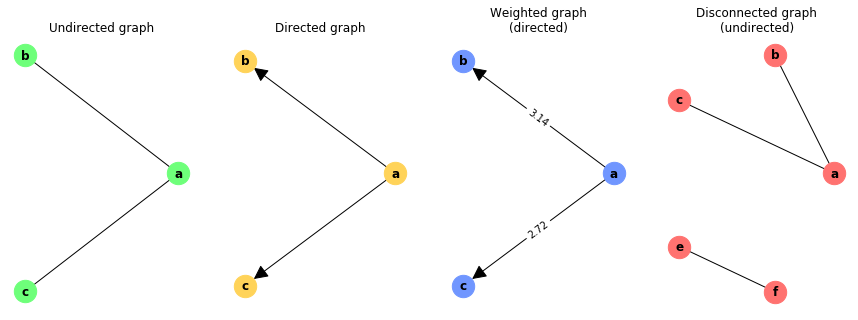

In [1]:
# NetworkX is a python library for graphs. 
# It provides several graph algorithms, but 
# I will use it mainly with matplotlib
# for visualizing graphs in this lecture.
# This is not part of the course, so you do
# not need to understand the code below.

import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

G = nx.Graph()
G.add_edge("a", "b")
G.add_edge("a", "c")

plt.subplot(141)
plt.title("Undirected graph")
nx.draw_circular(G, with_labels=True, font_weight='bold', node_color='#6eff7a', node_size=500)

DG = nx.DiGraph()
DG.add_edge("a", "b")
DG.add_edge("a", "c")

plt.subplot(142)
plt.title("Directed graph")
nx.draw_circular(DG, with_labels=True, font_weight='bold', node_color='#ffd359', node_size=500, arrowsize=30)

WG = nx.DiGraph()
WG.add_edge("a", "b", weight=3.14)
WG.add_edge("a", "c", weight=2.72)

plt.subplot(143)
plt.title("Weighted graph\n(directed)")
nx.draw_circular(WG, with_labels=True, font_weight='bold', node_color='#7096ff', node_size=500, arrowsize=30)
labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(WG, pos=nx.circular_layout(WG) , edge_labels=labels)

UG = nx.Graph()
UG.add_edge("a", "b")
UG.add_edge("a", "c")
UG.add_edge("e", "f")

plt.subplot(144)
plt.title("Disconnected graph\n(undirected)")
nx.draw_circular(UG, with_labels=True, font_weight='bold', node_color='#ff7270', node_size=500)

plt.show()

## Implementation

There are many different ways of implementing a graph in python. For the sake of this lecture, let's assume that the graph nodes are named. Suppose the graph we want to implement is the following:

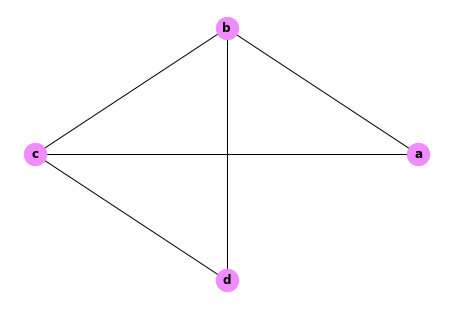

In [2]:
G = nx.diamond_graph()
nx.relabel_nodes(G, {0: 'a', 1: 'b', 2: 'c', 3: 'd'}, copy=False)
nx.draw_circular(G, with_labels=True, font_weight='bold', node_color='#f08cff', node_size=500)
plt.show()

We can create a dictionary where each key is the name of a node, and their values is a list with all its neighbors. If the graph is directed, this list will be all nodes the key node points to. This representation is called *adjacency list*.

Th adjacency list for the graph above is:

In [3]:
AL = {"a": ["b", "c"],
      "b": ["c", "d", "a"],
      "c": ["b", "a", "d"],
      "d": ["c", "b"]
     }

Alternatively, the values of this dictionary could be another dictionary labelled by nodes, whole value is a boolean indicating whether there is an edge between the key nodes, or the edge weigth. This representation is called *adjacency matrix*.

The adjacency matrix for the graph above is:

In [4]:
AM = {"a": {"a": False, "b": True,  "c": True,  "d": False},
      "b": {"a": True,  "b": False, "c": True,  "d": True},
      "c": {"a": True,  "b": True,  "c": False, "d": True},
      "d": {"a": False, "b": True,  "c": True,  "d": False}
     }

The advantages of adjacency lists is that we can quickly collect all neighbors of a node. Also, this is a more compact representation. For example, if there are 100 nodes, and a node N is only conneted to another node M, then N's entry would be a list with one element, as opposed to a dicionary with all nodes, where 99 of them are `False`.

The advantage of adjacency matrix is quick access. If we want to know if nodes N and M are connected, we simply need to check if `AM["N"]["M"]` is `True` or not. If we had adjacency lists, we would need to loop through N's list and check if M is there (the `in` command is a loop in disguise, so even though it looks very concise, it is doing some work in the back).

If the graph nodes are not named, but numbered sequentially, one can use lists of lists instead of dictionaries.

## Case study: food web

A food web is a networks of preys and predators. This can be naturally represented as a graph by taking each animal to be a node, and edges to be the prey/predator relation. Since this relation is unidirectional, the graph will be directed. The direction chosen is arbitrary, but of course it needs to be consistent. Let's adopt the following convention: there exists an edge from animal A to B if A *is eaten by* B (that is, B is A's predator).

We will use adjacency lists to represent our food web. They keys will be the animals and the values will be a list of that animal's preys.

The file used for this example can be downloaded [here](https://web2.qatar.cmu.edu/cs/15110/datasets/florida-foodweb.csv).

In [5]:
file = open("florida-foodweb.csv")

foodweb = {}
for line in file:
    if line.startswith("#"):
        continue
    vals = line.strip().split(",")
    prey = vals[0]
    predator = vals[1]
    if prey in foodweb:
        foodweb[prey] += [predator]
    else:
        foodweb[prey] = [predator]
        

### Exercises

Implement the functions below:

- `preysOf(animal, fw)`: returns the preys of `animal` according to `fw`
- `predatorsOf(animal, fw)`: returns the predators of `animal` according to `fw`
- `apexPredators(fw)`: returns the list of animals that have no predators according to `fw`
- `producers(fw)`: returns the list of animals that have no preys according to `fw`

In [6]:
def preysOf(animal, fw):
    return []

def predatorsOf(animal, fw):
    return []

def apexPredators(fw):
    return []

def producers(fw):
    return []

In graph terms, what you have to compute in each function is:

- `preysOf(animal, fw)`: the nodes that point to `animal` in graph `fw`
- `predatorsOf(animal, fw)`: the nodes that `animal` points to in graph `fw`
- `apexPredators(fw)`: the nodes that have zero outgoing edges in graph `fw`
- `producers(fw)`: the nodes that have zero incoming edges in graph `fw`